In [121]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [122]:
ds = pd.read_csv("Australian Vehicle Prices.csv")

ds

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16729,Toyota,2014.0,Alphard,SYC Cars,2014 Toyota Alphard,USED,Automatic,-,Front,Unleaded,-,66000,Grey / -,"Rocklea, QLD",-,Commercial,7 Seats,NaN,29500
16730,Mercedes-Benz,2012.0,S-Class,USED Dealer ad,2012 Mercedes-Benz S-Class CDI BlueTEC,USED,Automatic,-,Rear,Diesel,-,117432,Silver / -,"Port Melbourne, VIC",-,NaN,NaN,NaN,39888
16731,Suzuki,2022.0,Vitara,Bremer Suzuki - New,2022 Suzuki Vitara 1.6L,DEMO,Automatic,"4 cyl, 1.6 L",Front,Unleaded,6.2 L / 100 km,5165,Yellow / -,"Dinmore, QLD",4 cyl,SUV,4 Doors,5 Seats,35280
16732,Mercedes-Benz,2016.0,GLC250,SUV,2016 Mercedes-Benz GLC250,USED,Automatic,"4 cyl, 2 L",AWD,Premium,7.2 L / 100 km,85525,Grey / Black,"Albion, QLD",4 cyl,SUV,4 Doors,5 Seats,41888


In [123]:
dsinfo = ds.info()

ds_summary = ds.describe()

print(dsinfo)
print(ds_summary)

ds.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16734 entries, 0 to 16733
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              16733 non-null  object 
 1   Year               16733 non-null  float64
 2   Model              16733 non-null  object 
 3   Car/Suv            16706 non-null  object 
 4   Title              16733 non-null  object 
 5   UsedOrNew          16733 non-null  object 
 6   Transmission       16733 non-null  object 
 7   Engine             16733 non-null  object 
 8   DriveType          16733 non-null  object 
 9   FuelType           16733 non-null  object 
 10  FuelConsumption    16733 non-null  object 
 11  Kilometres         16733 non-null  object 
 12  ColourExtInt       16733 non-null  object 
 13  Location           16284 non-null  object 
 14  CylindersinEngine  16733 non-null  object 
 15  BodyType           16452 non-null  object 
 16  Doors              151

Brand                   1
Year                    1
Model                   1
Car/Suv                28
Title                   1
UsedOrNew               1
Transmission            1
Engine                  1
DriveType               1
FuelType                1
FuelConsumption         1
Kilometres              1
ColourExtInt            1
Location              450
CylindersinEngine       1
BodyType              282
Doors                1604
Seats                1705
Price                   3
dtype: int64

In [124]:
ds_dup = ds.duplicated()

ds_dup

0        False
1        False
2        False
3        False
4        False
         ...  
16729    False
16730    False
16731    False
16732    False
16733    False
Length: 16734, dtype: bool

In [125]:
ds.drop(['Doors', 'Seats', 'ColourExtInt'],axis=1,inplace=True)

In [126]:
#Change data values "Commercial", "Van" in "BodyType" column

ds.loc[ds['BodyType'] == "Commercial", "BodyType"] = "Van"

ds[ds['BodyType'] == "Van"].head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,Location,CylindersinEngine,BodyType,Price
5,Toyota,2004.0,Estima,ON FOUR WHEELS,2004 Toyota Estima T EDITION,USED,Automatic,-,Other,Unleaded,-,160230,"Saint Marys, NSW",-,Van,9990
10,Toyota,2009.0,HiAce,Carbarn,2009 Toyota HiAce (No Badge),USED,Automatic,-,Other,Unleaded,-,148190,"Lidcombe, NSW",-,Van,42500
11,Toyota,2018.0,HiAce,Commercial,2018 Toyota HiAce LWB,USED,Automatic,"4 cyl, 2.7 L",Rear,Unleaded,9.8 L / 100 km,16324,"Lidcombe, NSW",4 cyl,Van,41999
14,Toyota,2016.0,HiAce,Commercial,2016 Toyota HiAce LWB,USED,Automatic,"4 cyl, 3 L",Rear,Diesel,8 L / 100 km,229829,"Lidcombe, NSW",4 cyl,Van,27995
40,Toyota,2009.0,HiAce,Nippon Motors,2009 Toyota HiAce (No Badge),USED,Automatic,-,Rear,Unleaded,-,76259,"Ingleburn, NSW",-,Van,32900


In [127]:
# Ensure no NaN values in 'Model' and 'Title' columns
ds['Model'] = ds['Model'].fillna('')
ds['Title'] = ds['Title'].fillna('')

# Update 'BodyType' for models starting with "HiAce"
ds.loc[ds['Model'].str.startswith("HIACE"), "BodyType"] = "Van"

# Standardize 'HiAce' to 'Hiace' in the 'Model' and 'Title' columns
ds['Model'] = ds['Model'].str.replace('HiAce', 'Hiace', regex=False)
ds['Title'] = ds['Title'].str.replace('HiAce', 'Hiace', regex=False)

# Verify changes
changed_ds = ds[ds['Model'].str.contains("Hiace")]
changed_ds2 = ds[ds['Title'].str.contains("Hiace")]

changed_ds.head(5)


,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,Location,CylindersinEngine,BodyType,Price
10,Toyota,2009.0,Hiace,Carbarn,2009 Toyota Hiace (No Badge),USED,Automatic,-,Other,Unleaded,-,148190,"Lidcombe, NSW",-,Van,42500
11,Toyota,2018.0,Hiace,Commercial,2018 Toyota Hiace LWB,USED,Automatic,"4 cyl, 2.7 L",Rear,Unleaded,9.8 L / 100 km,16324,"Lidcombe, NSW",4 cyl,Van,41999
13,Toyota,2017.0,Hiace,USED Dealer ad,2017 Toyota Hiace,USED,Automatic,-,Other,-,-,136296,"Lidcombe, NSW",-,NaN,38999
14,Toyota,2016.0,Hiace,Commercial,2016 Toyota Hiace LWB,USED,Automatic,"4 cyl, 3 L",Rear,Diesel,8 L / 100 km,229829,"Lidcombe, NSW",4 cyl,Van,27995
40,Toyota,2009.0,Hiace,Nippon Motors,2009 Toyota Hiace (No Badge),USED,Automatic,-,Rear,Unleaded,-,76259,"Ingleburn, NSW",-,Van,32900


In [128]:
# Check if 'Location' exists in the DataFrame
if 'Location' in ds.columns:
    # Extract the last 3 characters from the 'Location' column and assign to 'States'
    ds['States'] = ds['Location'].str[-3:]
else:
    print("Column 'Location' does not exist.")

if 'Location' in ds.columns:
    # Extract the last 3 characters
    states_values = ds['Location'].str[-3:]
    
    # Get the position of 'Location'
    location_index = ds.columns.get_loc('Location')
    
    # Insert 'States' next to 'Location'
    if 'States' in ds.columns:
        ds.drop(columns=['States'], inplace=True)
    ds.insert(location_index + 1, 'States', states_values)
else:
    print("Column 'Location' does not exist.")

In [129]:
# Changing Brand name "Land Rover"

ds.loc[ds['Brand'] == "Land", "Brand"] = "Land Rover"

ds[ds['Brand'] == "Land Rover"].head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,Location,States,CylindersinEngine,BodyType,Price
6,Land Rover,2017.0,Rover,SUV,2017 Land Rover Range Rover Evoque TD4 180 HSE...,USED,Automatic,"4 cyl, 2 L",AWD,Diesel,5.1 L / 100 km,67662,"Blacktown, NSW",NSW,4 cyl,SUV,62280
152,Land Rover,2013.0,Rover,SUV,2013 Land Rover Discovery 4 3.0 TDV6,USED,Automatic,"6 cyl, 3 L",4WD,Diesel,8.8 L / 100 km,159558,"Glebe, NSW",NSW,6 cyl,SUV,38950
246,Land Rover,2020.0,Rover,SUV,2020 Land Rover Range Rover Evoque P200 S (147KW),USED,Automatic,"4 cyl, 2 L",AWD,Premium,8.1 L / 100 km,26227,"Rozelle, NSW",NSW,4 cyl,SUV,69800
285,Land Rover,2015.0,Rover,SUV,2015 Land Rover Discovery 4 3.0 SDV6 HSE,USED,Automatic,"6 cyl, 3 L",4WD,Diesel,8.8 L / 100 km,139968,"Castle Hill, NSW",NSW,6 cyl,SUV,54990
339,Land Rover,2004.0,Rover,Auto Outlet Direct,2004 Land Rover Range Rover HSE,USED,Automatic,-,Other,Diesel,-,236221,"Five Dock, NSW",NSW,-,Wagon,9999


In [130]:
def categorized_title(title, brand):
    # Return the original title for non-Land Rover cars
    if brand != "Land Rover":  
        return title

    # Check for missing values
    if pd.isna(title):  
        return "Not Found"
        
    # Convert to string to handle non-string values
    title = str(title)  
    if "Evoque" in title:
        return "Evoque"
    elif "Discovery" in title:
        return "Discovery"
    elif "HSE" in title:
        return "HSE"
    elif "Vogue" in title:
        return "Vogue"
    elif "Velar" in title:
        return "Velar"
    elif "Autobiography" in title:
        return "Autobiography"
    elif "Sport" in title:
        return "Sport"
    elif "P530" in title:
        return "P530"
    elif "Defender" in title:
        return "Defender"
    elif "Freelander" in title:
        return "Freelander"
    elif "P525" in title:
        return "P525"
    elif "D300" in title:
        return "D300"
    elif "D350" in title:
        return "D350"
    else:
        return "Not Found"

# Apply the function
ds['Model'] = ds.apply(lambda row: categorized_title(row['Title'], row['Brand']), axis=1)

ds[ds['Brand'] == "Land Rover"].head(5)

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,Location,States,CylindersinEngine,BodyType,Price
6,Land Rover,2017.0,Evoque,SUV,2017 Land Rover Range Rover Evoque TD4 180 HSE...,USED,Automatic,"4 cyl, 2 L",AWD,Diesel,5.1 L / 100 km,67662,"Blacktown, NSW",NSW,4 cyl,SUV,62280
152,Land Rover,2013.0,Discovery,SUV,2013 Land Rover Discovery 4 3.0 TDV6,USED,Automatic,"6 cyl, 3 L",4WD,Diesel,8.8 L / 100 km,159558,"Glebe, NSW",NSW,6 cyl,SUV,38950
246,Land Rover,2020.0,Evoque,SUV,2020 Land Rover Range Rover Evoque P200 S (147KW),USED,Automatic,"4 cyl, 2 L",AWD,Premium,8.1 L / 100 km,26227,"Rozelle, NSW",NSW,4 cyl,SUV,69800
285,Land Rover,2015.0,Discovery,SUV,2015 Land Rover Discovery 4 3.0 SDV6 HSE,USED,Automatic,"6 cyl, 3 L",4WD,Diesel,8.8 L / 100 km,139968,"Castle Hill, NSW",NSW,6 cyl,SUV,54990
339,Land Rover,2004.0,HSE,Auto Outlet Direct,2004 Land Rover Range Rover HSE,USED,Automatic,-,Other,Diesel,-,236221,"Five Dock, NSW",NSW,-,Wagon,9999


In [131]:
ds.loc[ds['BodyType'] == "Ute / Tray", "BodyType"] = "UTE"

In [132]:
ds[ds['BodyType'] == "UTE"]

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,Location,States,CylindersinEngine,BodyType,Price
22,Volkswagen,2023.0,2023 Volkswagen Amarok Style TDI600 4Motion,Alto Volkswagen New Cars,2023 Volkswagen Amarok Style TDI600 4Motion,NEW,Automatic,"6 cyl, 3 L",AWD,Diesel,8.4 L / 100 km,15,"Blacktown, NSW",NSW,6 cyl,UTE,83887
44,Mitsubishi,2016.0,2016 Mitsubishi Triton GLX Plus (4X4),Ute / Tray,2016 Mitsubishi Triton GLX Plus (4X4),USED,Automatic,"4 cyl, 2.4 L",4WD,Diesel,7.6 L / 100 km,240402,"Haberfield, NSW",NSW,4 cyl,UTE,22750
79,Holden,2010.0,2010 Holden Commodore SS-V,Ute / Tray,2010 Holden Commodore SS-V,USED,Manual,"8 cyl, 6 L",Rear,Unleaded,14.5 L / 100 km,169220,"Blacktown, NSW",NSW,8 cyl,UTE,25999
81,Mazda,2018.0,2018 Mazda BT-50 XTR (4X2),Ute / Tray,2018 Mazda BT-50 XTR (4X2),USED,Automatic,"5 cyl, 3.2 L",Rear,Diesel,9.3 L / 100 km,97460,"Haberfield, NSW",NSW,5 cyl,UTE,30990
126,Ford,2016.0,2016 Ford Ranger XLT 3.2 (4X4),Ute / Tray,2016 Ford Ranger XLT 3.2 (4X4),USED,Automatic,"5 cyl, 3.2 L",4WD,Diesel,9 L / 100 km,98700,"Five Dock, NSW",NSW,5 cyl,UTE,36999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16666,Mitsubishi,2015.0,2015 Mitsubishi Triton GLX (4X4),Ute / Tray,2015 Mitsubishi Triton GLX (4X4),USED,Automatic,"4 cyl, 2.4 L",4WD,Diesel,7.6 L / 100 km,115860,"Moorabbin, VIC",VIC,4 cyl,UTE,33950
16669,Mitsubishi,2010.0,2010 Mitsubishi Triton GLX (4X4),Ute / Tray,2010 Mitsubishi Triton GLX (4X4),USED,Automatic,"4 cyl, 2.5 L",4WD,Diesel,9.9 L / 100 km,257447,"Avondale Heights, VIC",VIC,4 cyl,UTE,15999
16715,Mitsubishi,2015.0,2015 Mitsubishi Triton GLX (4X4),Ute / Tray,2015 Mitsubishi Triton GLX (4X4),USED,Automatic,"4 cyl, 2.5 L",4WD,Diesel,9.3 L / 100 km,106756,"Dandenong, VIC",VIC,4 cyl,UTE,27850
16719,Ford,2019.0,2019 Ford Ranger XL 3.2 (4X4),Ute / Tray,2019 Ford Ranger XL 3.2 (4X4),USED,Automatic,"5 cyl, 3.2 L",4WD,Diesel,8.7 L / 100 km,45837,"Dingley Village, VIC",VIC,5 cyl,UTE,47990


In [133]:
ds.loc[ds['BodyType'] == "Other", "BodyType"] = ""

ds[ds['BodyType'] == "Other"]

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,Location,States,CylindersinEngine,BodyType,Price


In [134]:
ds.isnull().sum()

Brand                  1
Year                   1
Model                  0
Car/Suv               28
Title                  0
UsedOrNew              1
Transmission           1
Engine                 1
DriveType              1
FuelType               1
FuelConsumption        1
Kilometres             1
Location             450
States               450
CylindersinEngine      1
BodyType             282
Price                  3
dtype: int64

In [135]:
# Keywords for each body type
bodytype_keywords = {
    "Sedan": ["City", "C-CLASS", "Impreza", "Calais", "3", "5", "7", "A3", "A5", "RS", "190", "Corolla", "WRX", 
              "S-Class", "Skyline", "Axela", "Cruze", "Accord", "Sai", "E-CLASS", "Crown", "Lancer", "Jetta", 
              "S60", "M3", "Prius", "Model", "Camry", "Sonata", "Cerato", "A4", "Commodore", "Altezza", "Falcon", 
              "C320", "HS", "Flying", "6", "Sebring", "Century", "Berlina", "XJ", "300", "508", "Stanza", "120", 
              "2002", "Model 3", "Pulsar", "C200", "Ghibli"],
    "SUV": ["RAV4", "CR-V", "Tucson", "CX-5", "Forester", "Land Cruiser", "Pajero", "Outlander", "X5", "Kuga", "H2", 
            "Rover", "D90", "Evoque", "Discovery", "Landcruiser", "Sport"],
    "Hatchback": ["Yaris", "2", "Focus", "Golf", "Clio", "i30", "Civic", "Fiesta", "Swift", "Micra", "Tiida", 
                  "Fit", "Note", "MK", "Getz", "Ractis"],
    "UTE": ["Hilux", "Ranger", "Navara", "Colorado", "BT-50", "D-Max", "Triton", "Amarok", "Gladiator", "FPV", 
            "GS", "T60", "Ducato"],
    "Van": ["Hiace", "Transit", "Carnival", "Vito", "Caddy", "iLoad", "Every", "Deliver", "G10+", "Crafter", 
            "Sprinters", "Delivers"],
    "Convertible": ["MX-5", "Z4", "718", "Mustang Convertible", "TT Roadster", "Cabrio", "Corvette"],
    "Wagon": ["Passat", "Outback", "Levorg", "V60", "E-Class Wagon", "Commodore Wagon"],
    "People Mover": ["Alphard", "Vellfire", "Mifa"],
    "Truck": ["Atlas", "Trucks", "NMR", "NLS", "NLR", "Hijet"]
}

# Function to determine the body type from model (case insensitive and cleans spaces)
def get_body_type(model):
    model = model.strip().lower()  # Convert model to lowercase and strip spaces
    for body_type, keywords in bodytype_keywords.items():
        if any(keyword.lower() in model for keyword in keywords):
            return body_type
    return "Not Found"  # If no match found

# Ensure 'BodyType' column exists in the dataframe
ds['BodyType'] = ds.get('BodyType', '')

# Fill missing values only where BodyType is blank or NaN
ds['BodyType'] = ds.apply(lambda row: get_body_type(row['Model'])
                          if pd.isna(row['BodyType']) or row['BodyType'] == ''
                          else row['BodyType'], axis=1)

# Display updated rows for validation
print(ds.loc[ds['BodyType'] == 'Not Found', ['Model', 'BodyType']].head())


     Model   BodyType
2391        Not Found


In [136]:
ds = ds[ds['BodyType'] != 'Not Found']

In [137]:
# Define the models and their respective body types to be updated
model_to_bodytype = {
    "Hijet": "Truck",
    "Alphard": "People Mover",
    "Vellfire": "People Mover",
    "Crafter": "Van",
    "Hiace": "Van"
}

# Function to update the BodyType based on the model
def update_bodytype(row):
    for model, body_type in model_to_bodytype.items():
        if model in row['Model']:
            return body_type
    return row['BodyType']  # Keep the original value if no match is found

# Apply the function to the BodyType column using .loc to avoid SettingWithCopyWarning
ds.loc[:, 'BodyType'] = ds.apply(update_bodytype, axis=1)

# Display some rows to verify the update
print(ds.loc[ds['Model'].str.contains('Hijet|Alphard|Vellfire|Crafter|Hiace', case=False), ['Model', 'BodyType']].head())


                           Model BodyType
10  2009 Toyota Hiace (No Badge)      Van
11         2018 Toyota Hiace LWB      Van
13             2017 Toyota Hiace      Van
14         2016 Toyota Hiace LWB      Van
40  2009 Toyota Hiace (No Badge)      Van


In [138]:
# Remove 'cyl' from CylindersinEngine and convert to numeric using .loc to avoid SettingWithCopyWarning
ds.loc[:, 'CylindersinEngine'] = ds['CylindersinEngine'].str.replace(r'\D', '', regex=True)
ds.loc[:, 'CylindersinEngine'] = pd.to_numeric(ds['CylindersinEngine'], errors='coerce')

# Move 'CylindersinEngine' next to 'Engine'
columns = ds.columns.tolist()
columns.remove('CylindersinEngine')
engine_index = columns.index('Engine')
columns.insert(engine_index + 1, 'CylindersinEngine')
ds = ds[columns]


In [139]:
# Clean 'Engine' column by keeping only the engine size and removing the cylinder count, retaining 'L' for clarity
ds['Engine'] = ds['Engine'].str.extract(r'(\d+\.\d+|\d+)(?:\s*L)', expand=False)

# Extract only the first decimal number and ignore invalid entries
ds['FuelConsumption'] = ds['FuelConsumption'].astype(str).str.extract(r'(\d+\.\d+|\d+)', expand=False)
ds['FuelConsumption'] = pd.to_numeric(ds['FuelConsumption'], errors='coerce').round(1)

# Convert 'Year' column to integer without decimal places
if 'Year' in ds.columns:
    ds['Year'] = pd.to_numeric(ds['Year'], errors='coerce').astype('Int64')
    
ds.head(5)


,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,CylindersinEngine,DriveType,FuelType,FuelConsumption,Kilometres,Location,States,BodyType,Price
0,Ssangyong,2022,2022 Ssangyong Rexton Ultimate (awd),Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,2.2,4.0,AWD,Diesel,8.7,5595,"Caringbah, NSW",NSW,SUV,51990
1,MG,2022,2022 MG MG3 Auto Excite (with Navigation),Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,1.5,4.0,Front,Premium,6.7,16,"Brookvale, NSW",NSW,Hatchback,19990
2,BMW,2022,2022 BMW 430I M Sport,Coupe,2022 BMW 430I M Sport,USED,Automatic,2,4.0,Rear,Premium,6.6,8472,"Sylvania, NSW",NSW,Coupe,108988
3,Mercedes-Benz,2011,2011 Mercedes-Benz E500 Elegance,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,5.5,8.0,Rear,Premium,11.0,136517,"Mount Druitt, NSW",NSW,Coupe,32990
4,Renault,2022,2022 Renault Arkana Intens,SUV,2022 Renault Arkana Intens,USED,Automatic,1.3,4.0,Front,Unleaded,6.0,1035,"Castle Hill, NSW",NSW,SUV,34990


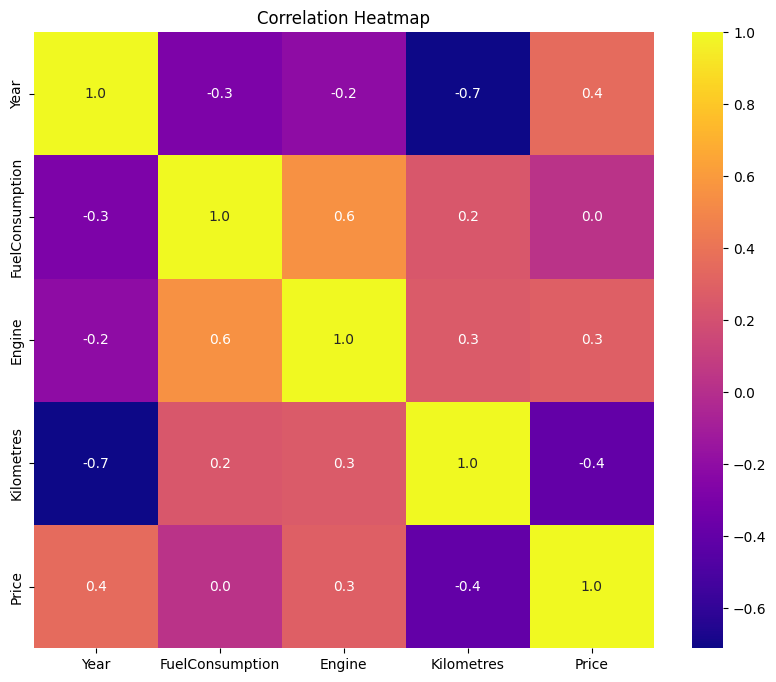

In [140]:
# Select only the specified attributes for the correlation heatmap
df_numeric = ds[['Year', 'FuelConsumption', 'Engine', 'Kilometres', 'Price']]

# Convert columns to numeric, coercing errors to NaN
df_numeric = df_numeric.apply(pd.to_numeric, errors='coerce')

# Drop rows with all missing values in the selected columns
df_numeric = df_numeric.dropna(how='all')

# Calculate the correlation matrix
corr_matrix = df_numeric.corr()

# Plot the heatmap if the correlation matrix is non-empty
if not corr_matrix.empty:
    plt.figure(figsize=(10,8))
    sns.heatmap(corr_matrix, annot=True, cmap="plasma", fmt=".1f")
    plt.title("Correlation Heatmap")
    plt.show()
else:
    print("No valid numerical data available for correlation matrix generation.")


In [141]:
ds = pd.read_csv('cleaneddata.csv')


In [142]:
ds.dropna(subset=['Year', 'Engine', 'FuelConsumption', 'Kilometres', 'Price'], inplace=True)


In [143]:
ds['Year'] = pd.to_numeric(ds['Year'], errors='coerce')
ds['Engine'] = pd.to_numeric(ds['Engine'], errors='coerce')
ds['FuelConsumption'] = pd.to_numeric(ds['FuelConsumption'], errors='coerce')
ds['Kilometres'] = pd.to_numeric(ds['Kilometres'], errors='coerce')
ds['Price'] = pd.to_numeric(ds['Price'], errors='coerce')


In [144]:
from sklearn.preprocessing import LabelEncoder

# Perform label encoding for 'Brand'
if 'Brand' in ds.columns:
    LE = LabelEncoder()
    ds['Brand'] = LE.fit_transform(ds['Brand'])

# One-hot encoding for specified categorical columns
cat_cols = ['UsedOrNew', 'Transmission', 'DriveType', 'FuelType', 'BodyType']
for col in cat_cols:
    if col in ds.columns:
        dummies = pd.get_dummies(ds[col], prefix=col).astype(int)
        ds = pd.concat([ds, dummies], axis=1)

# Display the updated dataset
print("Dataset after one-hot encoding:")
print(ds.head())

Dataset after one-hot encoding:
   Brand  Year   Model               Car/Suv  \
0     60  2022  Rexton  Sutherland Isuzu Ute   
1     41  2022     MG3             Hatchback   
2      4  2022    430I                 Coupe   
3     46  2011    E500                 Coupe   
4     55  2022  Arkana                   SUV   

                                       Title UsedOrNew Transmission  Engine  \
0       2022 Ssangyong Rexton Ultimate (awd)      DEMO    Automatic     2.2   
1  2022 MG MG3 Auto Excite (with Navigation)      USED    Automatic     1.5   
2                      2022 BMW 430I M Sport      USED    Automatic     2.0   
3           2011 Mercedes-Benz E500 Elegance      USED    Automatic     5.5   
4                 2022 Renault Arkana Intens      USED    Automatic     1.3   

  CylindersinEngine DriveType  ... BodyType_Convertible  BodyType_Coupe  \
0                 4       AWD  ...                    0               0   
1                 4     Front  ...                    

Variance Inflation Factor (VIF):
           Feature       VIF
0       Kilometres  1.077397
1           Engine  1.699562
2  FuelConsumption  1.678795
Outliers in each column (Z-Score Method):
{'Kilometres': 127, 'Engine': 266, 'FuelConsumption': 314, 'Price': 208}


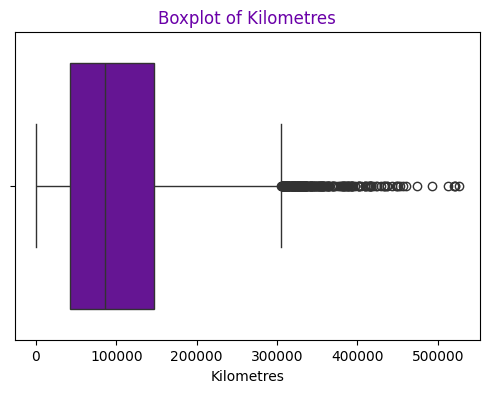

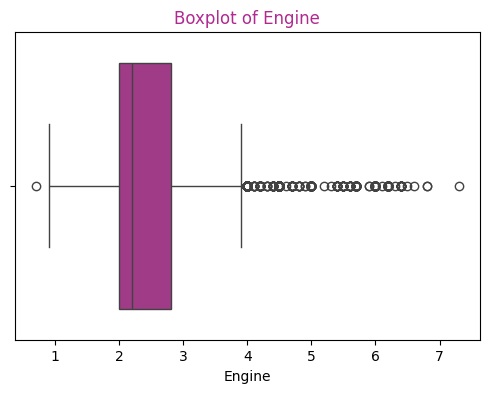

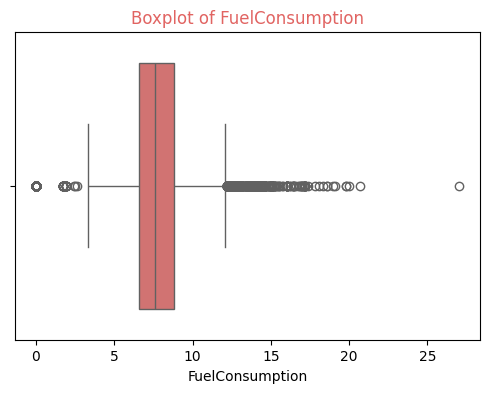

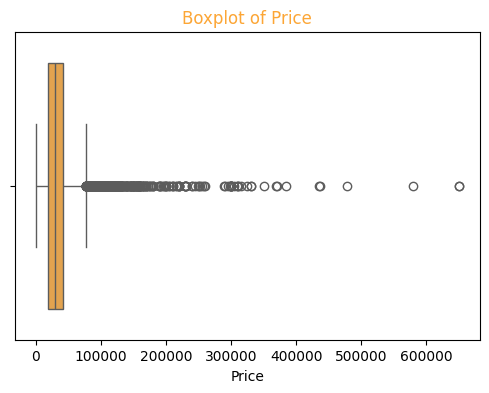

Shapiro-Wilk Test for Normality:
Statistic: 0.6460109125263298, P-value: 1.6343811843257495e-98
Residuals do not appear to be normally distributed.


c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 14364.
  res = hypotest_fun_out(*samples, **kwds)


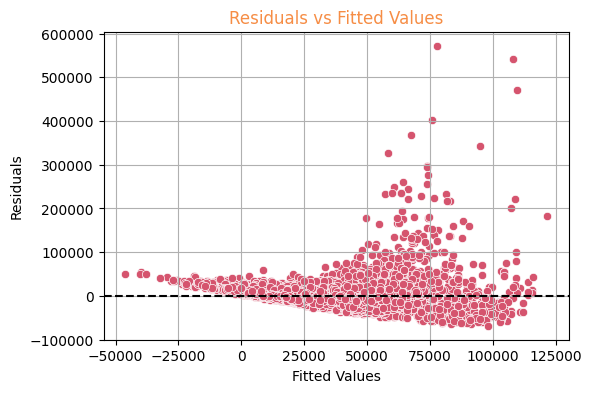

In [145]:
from scipy.stats import zscore, shapiro
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure data is numeric, coercing errors to NaN
relevant_columns = ['Kilometres', 'Engine', 'FuelConsumption', 'Price']
data = ds[relevant_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing or invalid data
data = data.dropna()

# Function to check for outliers using Z-score
def check_outliers_zscore(df, threshold=3):
    outliers = {}
    for col in df.columns:
        z_scores = zscore(df[col])
        outliers[col] = df[(z_scores > threshold) | (z_scores < -threshold)].shape[0]
    return outliers

# Function to visualize outliers
def plot_boxplots(df):
    plasma_cmap = sns.color_palette("plasma", len(df.columns))
    for i, col in enumerate(df.columns):
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=df[col], color=plasma_cmap[i])
        plt.title(f"Boxplot of {col}", color=plasma_cmap[i])
        plt.show()

# Function to check residual normality (Shapiro-Wilk test)
def check_residual_normality(residuals):
    stat, p_value = shapiro(residuals)
    print("Shapiro-Wilk Test for Normality:")
    print(f"Statistic: {stat}, P-value: {p_value}")
    if p_value > 0.05:
        print("Residuals appear to be normally distributed.")
    else:
        print("Residuals do not appear to be normally distributed.")

# Function to calculate Variance Inflation Factor (VIF)
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns
    vif_data["VIF"] = [
        1 / (1 - sm.OLS(df[col], sm.add_constant(df.drop(columns=[col]))).fit().rsquared)
        for col in df.columns
    ]
    return vif_data

# Drop the target column 'Price' from the features for VIF calculation
features = data.drop(columns=['Price'])

# Check and calculate VIF
vif_results = calculate_vif(features)
print("Variance Inflation Factor (VIF):")
print(vif_results)

# Outlier detection
outliers = check_outliers_zscore(data)
print("Outliers in each column (Z-Score Method):")
print(outliers)

# Plot boxplots to visualize outliers
plot_boxplots(data)

# Example Linear Regression Residual Analysis
X = data[['Kilometres', 'Engine', 'FuelConsumption']]
X = sm.add_constant(X)  # Add constant for intercept
Y = data['Price']
model = sm.OLS(Y, X).fit()
residuals = model.resid

# Check residual normality
check_residual_normality(residuals)

# Plot residuals
plt.figure(figsize=(6, 4))
sns.scatterplot(x=model.fittedvalues, y=residuals, color=sns.color_palette("plasma", 10)[5])
plt.axhline(0, color= 'black', linestyle='--')
plt.title("Residuals vs Fitted Values", color=sns.color_palette("plasma", 10)[7])
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.grid()
plt.show()


In [146]:
from sklearn.model_selection import train_test_split

X = ds_cleaned.drop(['Price'], axis=1)
y = ds_cleaned['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [147]:
non_numeric_columns = X_train.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)


Non-numeric columns: Index(['Model', 'Car/Suv', 'Title', 'UsedOrNew', 'Transmission',
       'CylindersinEngine', 'DriveType', 'FuelType', 'Location', 'States',
       'BodyType'],
      dtype='object')


In [148]:
if len(non_numeric_columns) > 0:
    X_train = pd.get_dummies(X_train, columns=non_numeric_columns, drop_first=True)
    X_test = pd.get_dummies(X_test, columns=non_numeric_columns, drop_first=True)

In [149]:
X_train.dropna(inplace=True)
X_test.dropna(inplace=True)


Original Data Shape: (14893, 45)
Cleaned Data Shape (IQR Method): (12550, 45)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9784\464009.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = pd.to_numeric(data[col], errors='coerce')


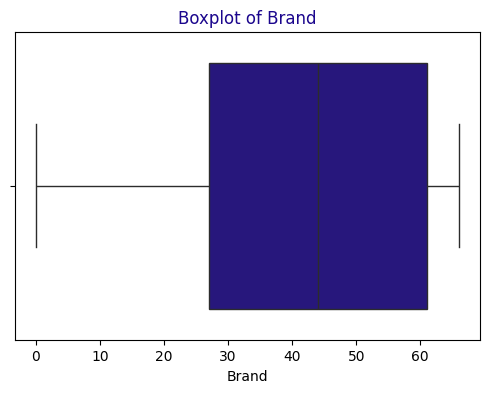

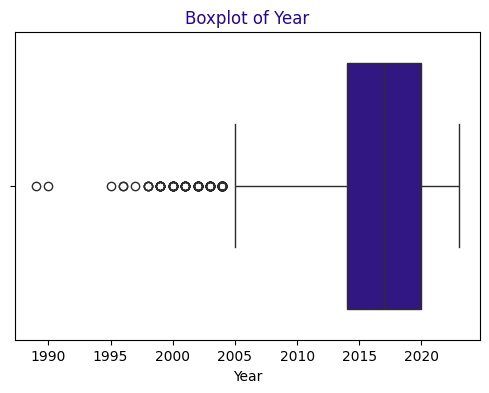

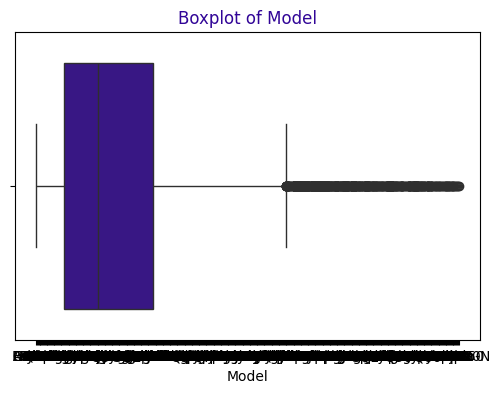

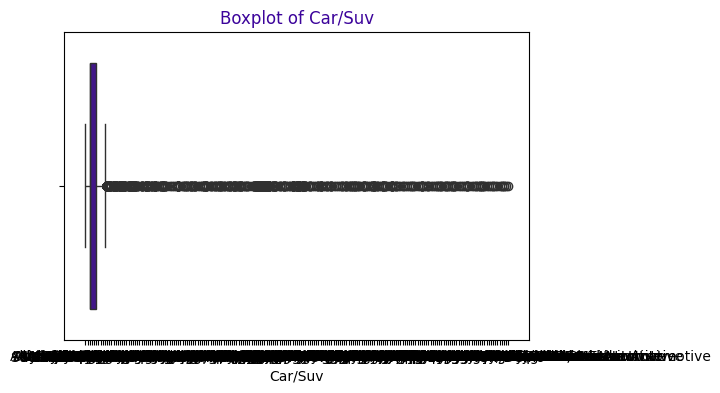

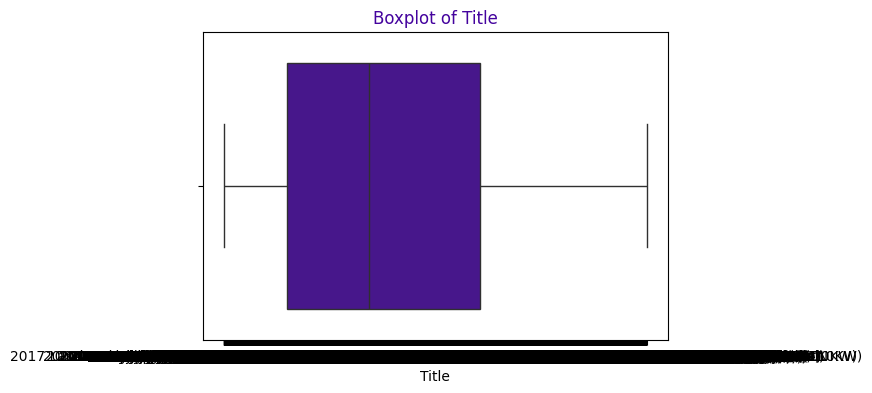

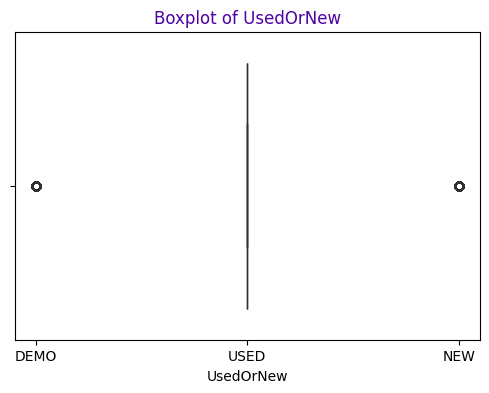

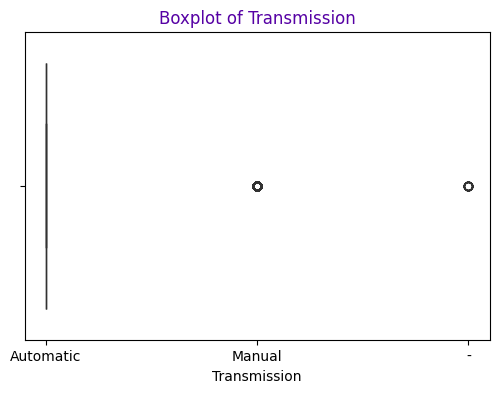

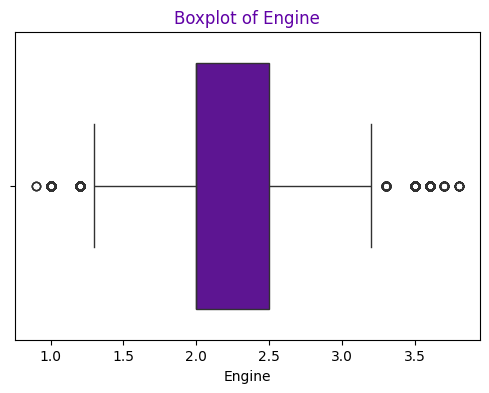

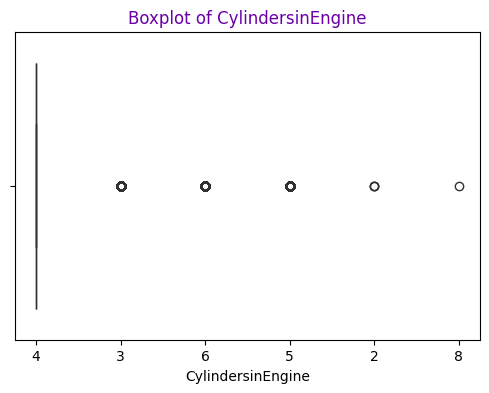

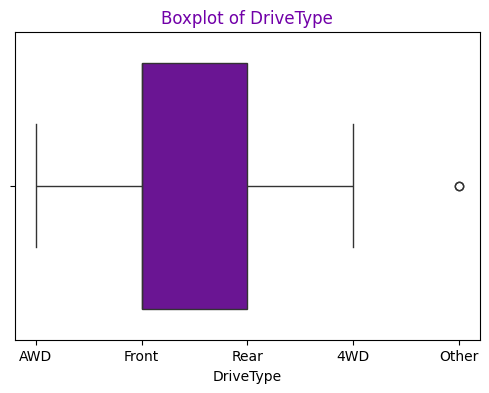

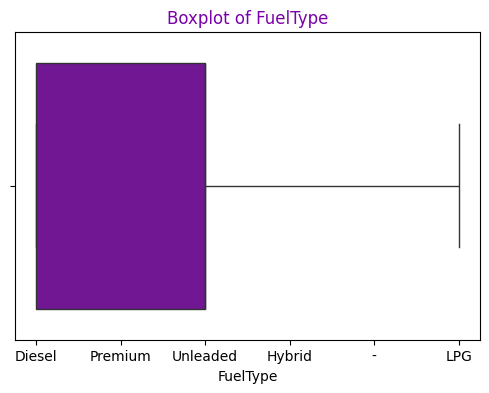

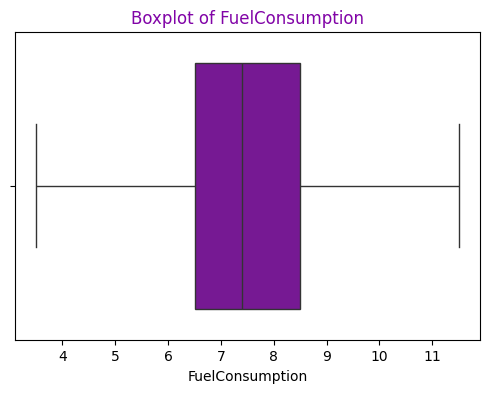

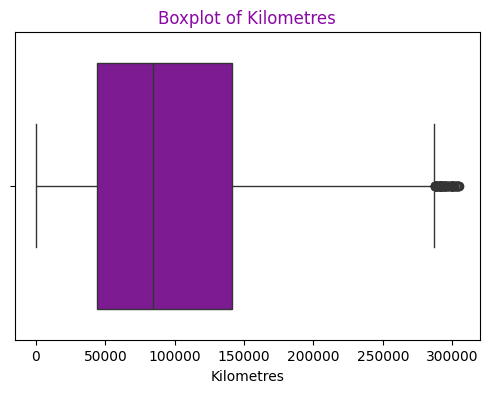

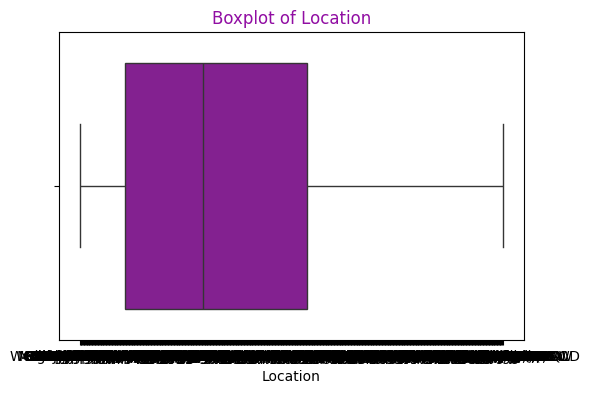

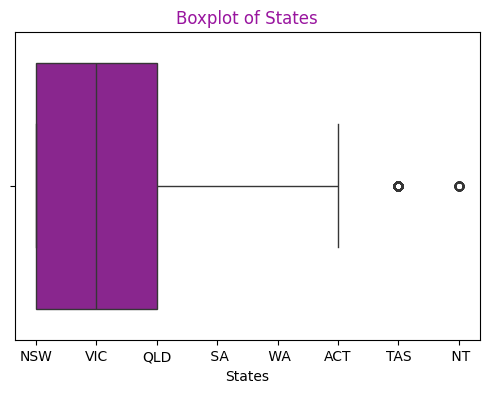

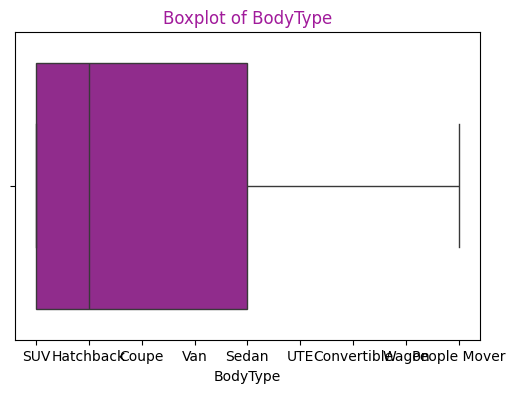

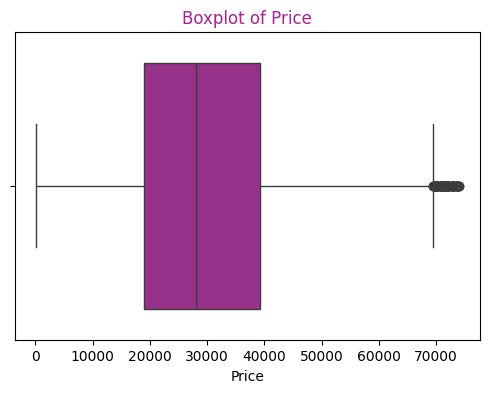

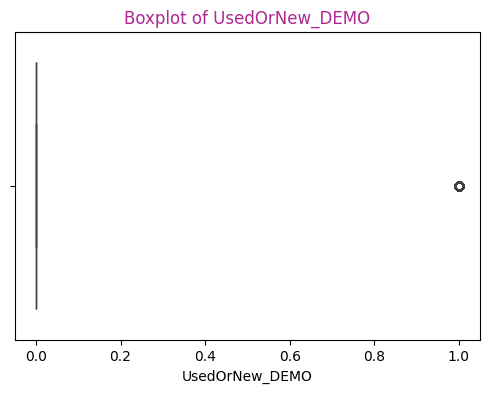

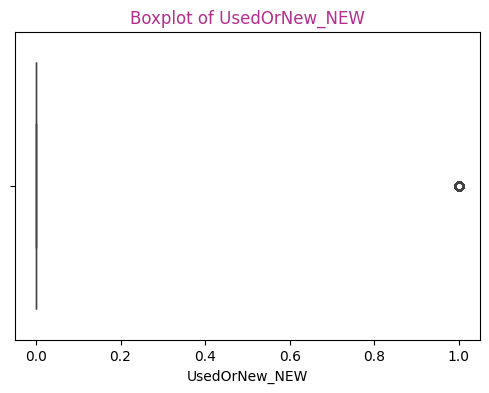

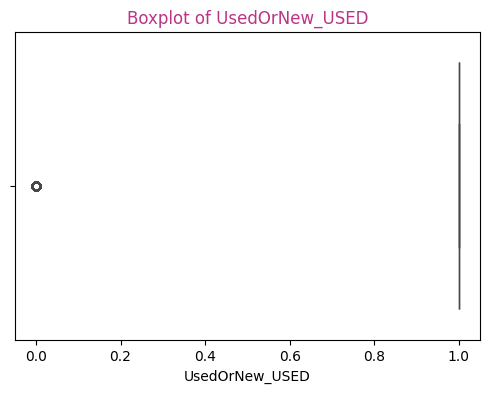

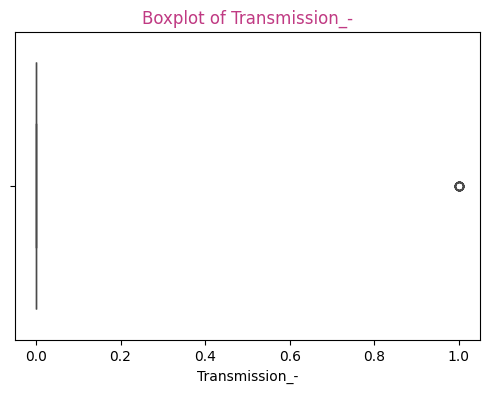

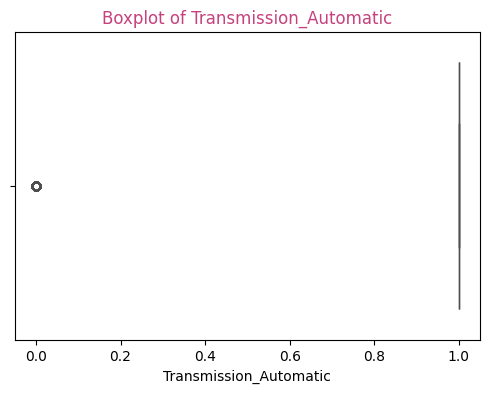

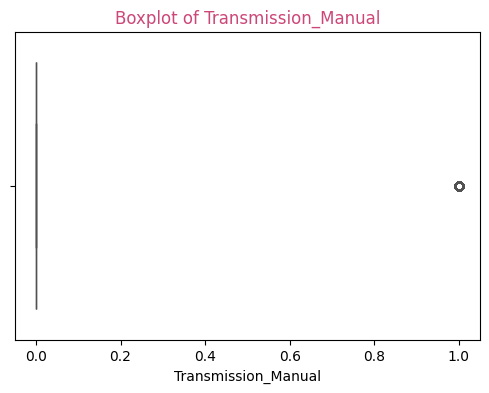

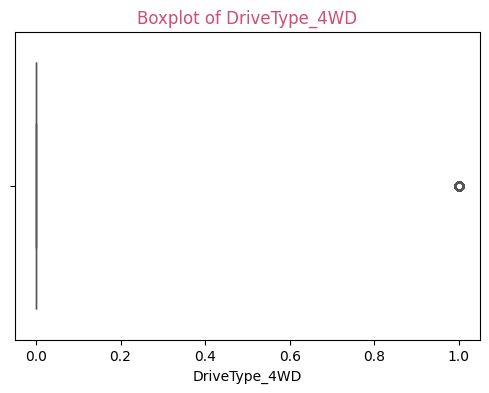

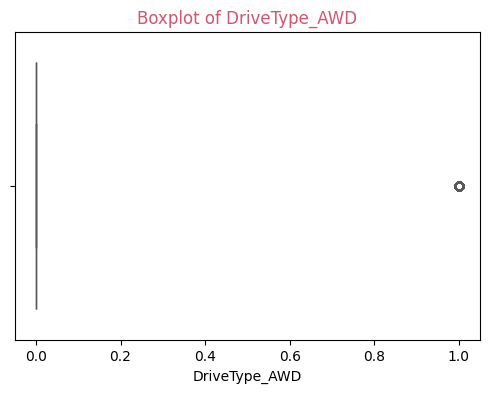

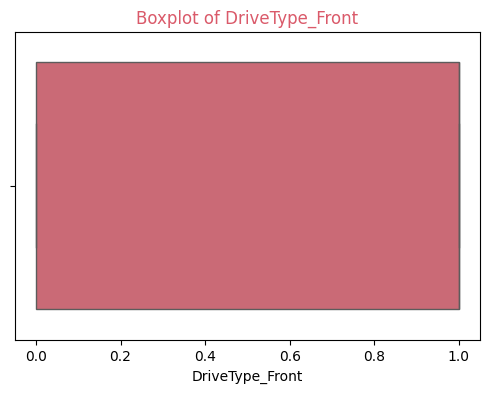

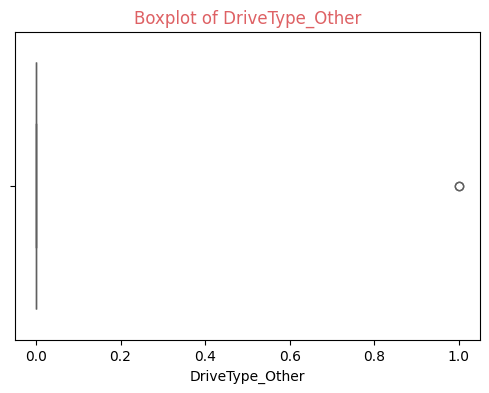

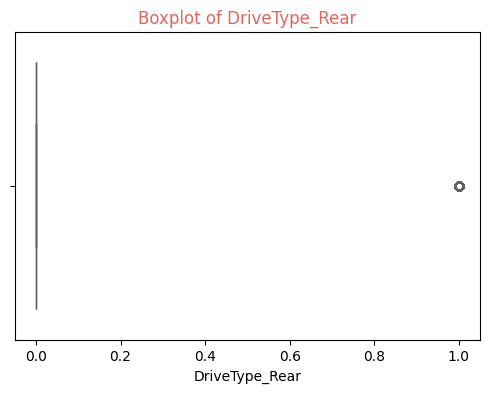

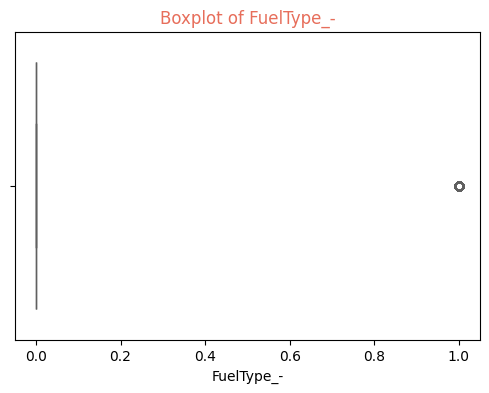

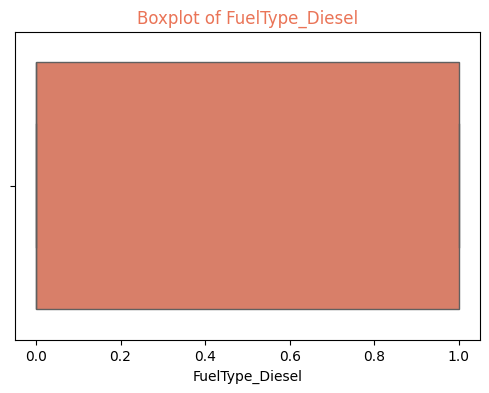

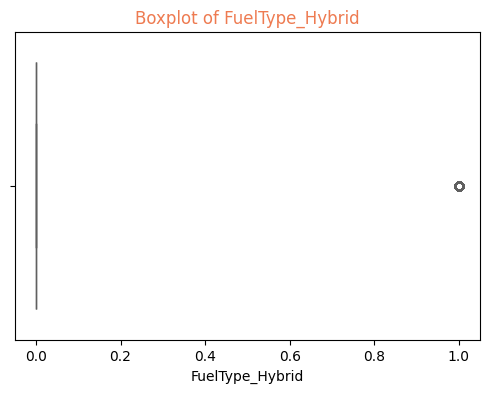

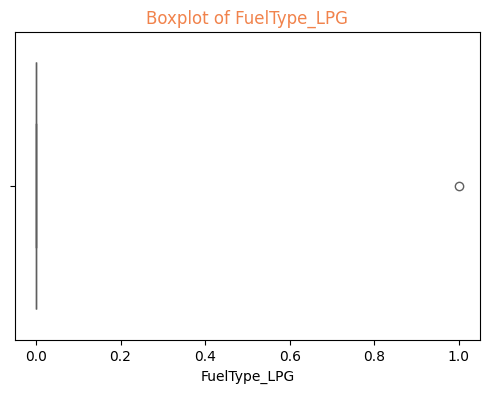

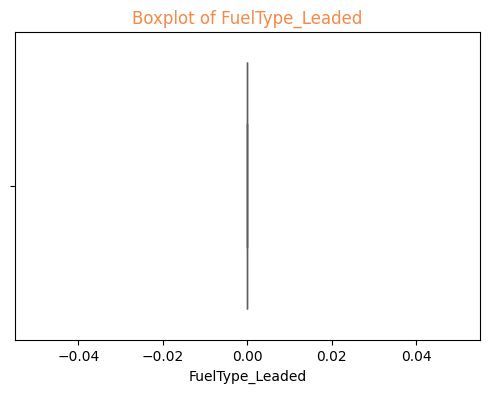

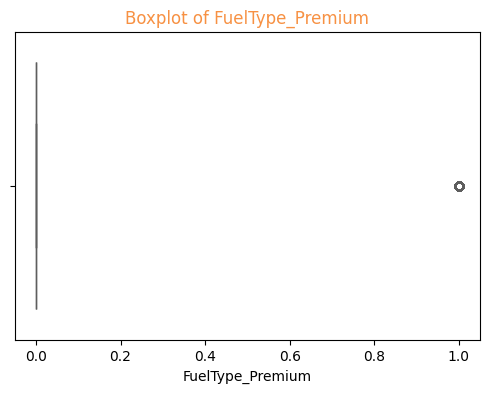

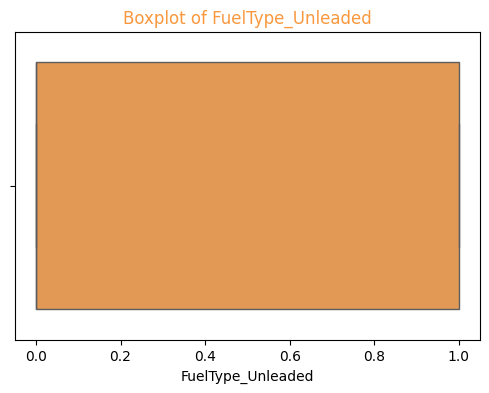

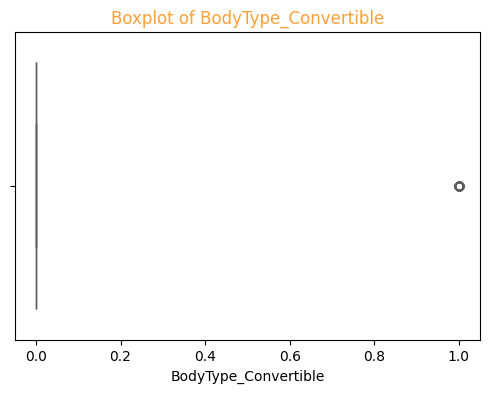

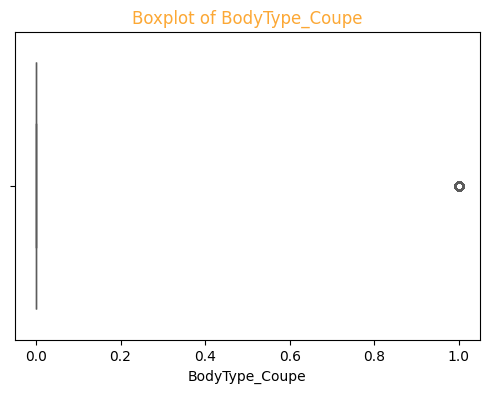

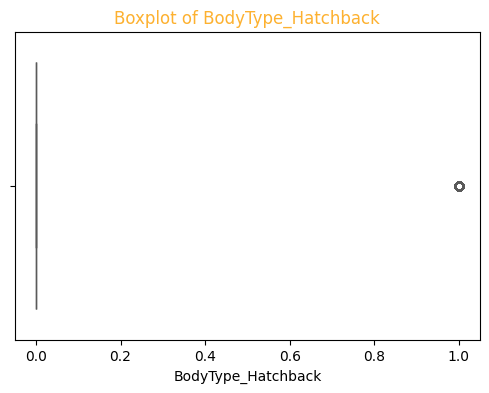

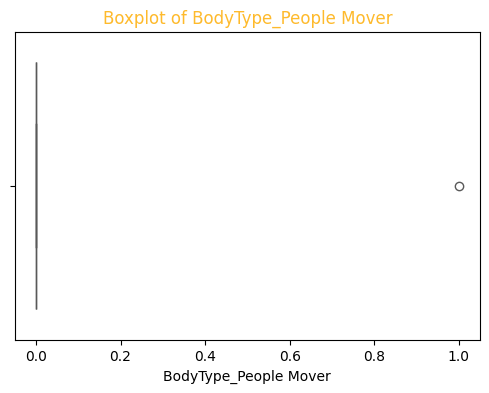

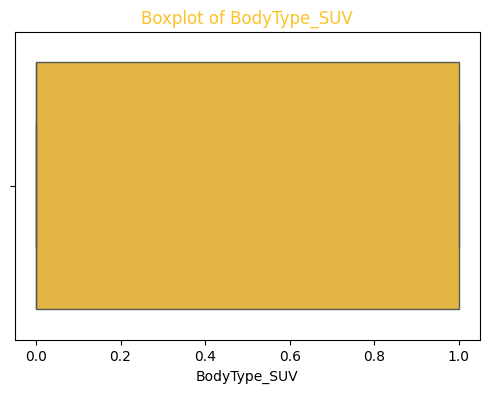

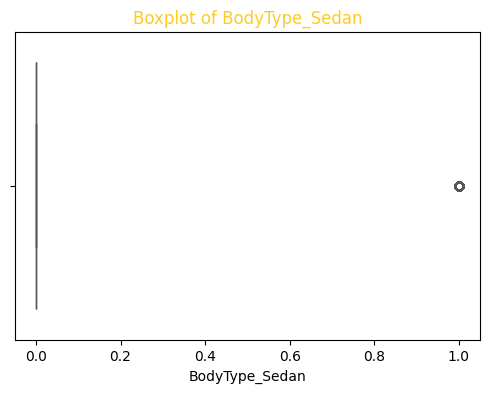

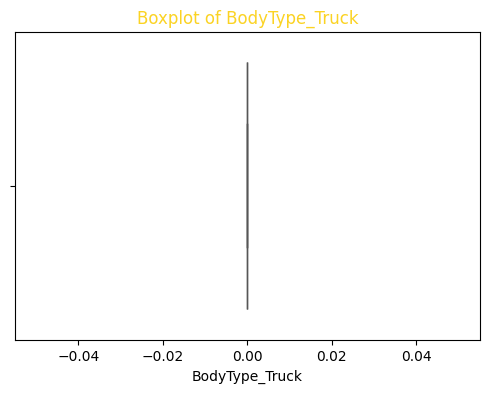

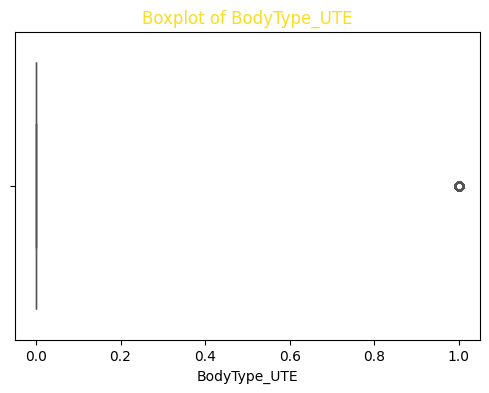

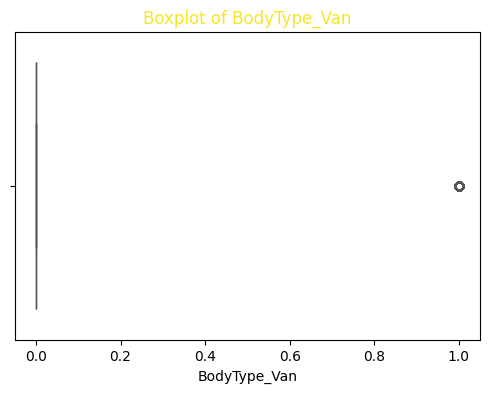

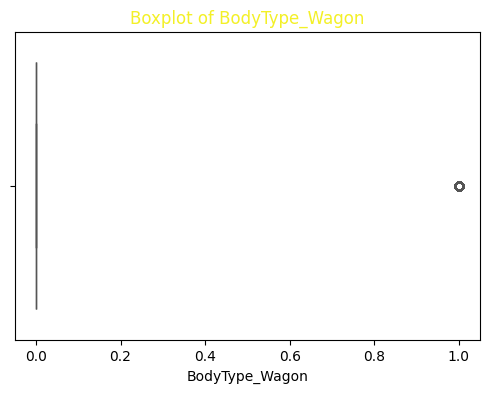

In [171]:

from scipy.stats import zscore, shapiro
import statsmodels.api as sm

# Define a function to remove outliers using the IQR method
def remove_outliers_iqr(data, columns):
    """
    Removes rows with outliers in the specified columns based on the IQR method.

    Parameters:
        data (DataFrame): The input DataFrame.
        columns (list): List of column names to check for outliers.

    Returns:
        DataFrame: The DataFrame with outliers removed.
    """
    for col in columns:
        if col in data.columns:
            # Ensure the column is numeric
            data[col] = pd.to_numeric(data[col], errors='coerce')
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

# Specify columns to check for outliers
columns_to_check = ['Kilometres', 'Engine', 'FuelConsumption', 'Price']

# Ensure all columns are numeric before applying the IQR method
for col in columns_to_check:
    if col in ds.columns:
        ds[col] = pd.to_numeric(ds[col], errors='coerce')

# Remove outliers using the IQR method
cleaned_data = remove_outliers_iqr(ds, columns_to_check)

# Display the cleaned dataset
print("Original Data Shape:", ds.shape)
print("Cleaned Data Shape (IQR Method):", cleaned_data.shape)

# Select numeric columns for correlation analysis
relevant_columns = ['Year', 'FuelConsumption', 'Engine', 'Kilometres', 'Price']
data_for_corr = cleaned_data[relevant_columns].dropna()

# Function to visualize outliers
def plot_boxplots(cleaned_data):
    plasma_cmap = sns.color_palette("plasma", len(cleaned_data.columns))
    for i, col in enumerate(cleaned_data.columns):
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=cleaned_data[col], color=plasma_cmap[i])
        plt.title(f"Boxplot of {col}", color=plasma_cmap[i])
        plt.show()

# Plot boxplots to visualize outliers
plot_boxplots(cleaned_data)

Non-numeric columns detected: ['Model', 'Car/Suv', 'Title', 'UsedOrNew', 'Transmission', 'CylindersinEngine', 'DriveType', 'FuelType', 'Location', 'States', 'BodyType']
    Model               Car/Suv  \
0  Rexton  Sutherland Isuzu Ute   
1     MG3             Hatchback   
4  Arkana                   SUV   
6  Evoque                   SUV   
7  Pulsar             Hatchback   

                                               Title UsedOrNew Transmission  \
0               2022 Ssangyong Rexton Ultimate (awd)      DEMO    Automatic   
1          2022 MG MG3 Auto Excite (with Navigation)      USED    Automatic   
4                         2022 Renault Arkana Intens      USED    Automatic   
6  2017 Land Rover Range Rover Evoque TD4 180 HSE...      USED    Automatic   
7                              2000 Nissan Pulsar LX      USED    Automatic   

  CylindersinEngine DriveType  FuelType             Location States   BodyType  
0                 4       AWD    Diesel       Caringbah, NSW    

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9784\554971062.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='plasma')


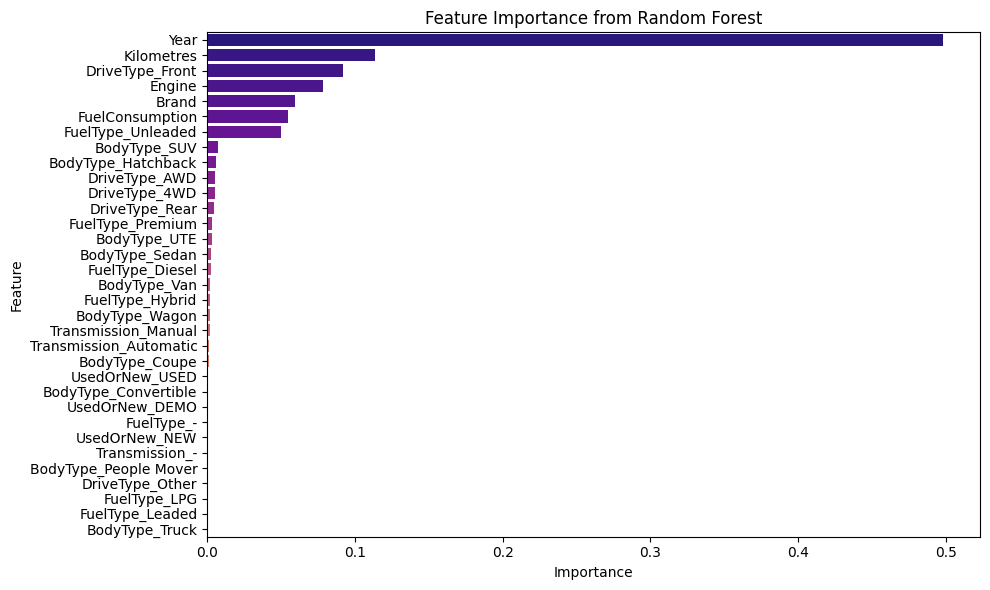

In [151]:
from sklearn.utils.validation import check_X_y
from sklearn.ensemble import RandomForestRegressor

# Ensure feature columns and target variable have the same number of rows
X = X.dropna()
y = y.dropna()

# Align X and y after dropping missing values
X, y = X.align(y, join='inner', axis=0)

# Identify non-numeric columns
non_numeric_columns = X.select_dtypes(include=['object']).columns.tolist()

if len(non_numeric_columns) > 0:
    print("Non-numeric columns detected:", non_numeric_columns)
    print(X[non_numeric_columns].head())  # View the first few rows

    # Option 1: Drop non-numeric columns if unnecessary
    X = X.drop(columns=non_numeric_columns, errors='ignore')

    # Option 2: Encode non-numeric columns if needed
    for col in non_numeric_columns:
        if col in X.columns:  # Check if column exists before processing
            if X[col].nunique() <= 10:  # Few unique values, use one-hot encoding
                dummies = pd.get_dummies(X[col], prefix=col, drop_first=True)
                X = pd.concat([X.reset_index(drop=True), dummies.reset_index(drop=True)], axis=1)
            else:  # Many unique values, use label encoding
                le = LabelEncoder()
                X[col] = le.fit_transform(X[col])

# Ensure all columns are numeric
if len(X.select_dtypes(include=['object']).columns) > 0:
    raise ValueError("There are still non-numeric columns in the dataset. Please review them.")

# Check consistency of X and y
assert len(X) == len(y), f"Mismatch in number of samples: X ({len(X)}), y ({len(y)})"

# Fit Random Forest model
rf = RandomForestRegressor(random_state=42)
rf.fit(X, y)

# Feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='plasma')
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [154]:
# Ensure numeric data and remove any missing values
X = X.apply(pd.to_numeric, errors='coerce')

# Combine X and y to ensure alignment when removing missing values
data = pd.concat([X, y], axis=1)

# Drop rows with missing values
data.dropna(inplace=True)

# Separate the cleaned features and target variable
X = data.drop(columns=['Price'])  # Ensure 'Price' is the correct target variable
y = data['Price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (12550, 33)
y shape: (12550,)


--- Linear Regression ---
MAE: 5992.45
MSE: 63137904.33
R2 Score: 0.72
-------------------------------


c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.119e+09, tolerance: 2.262e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9784\3007874775.py:55: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.barplot(x=results_df.index, y=results_df['MAE'], hue=results_df.index, palette=custom_cmap, legend=False)


--- Lasso Regression ---
MAE: 5992.36
MSE: 63136474.63
R2 Score: 0.72
-------------------------------
--- Ridge Regression ---
MAE: 5992.40
MSE: 63137953.20
R2 Score: 0.72
-------------------------------
--- ElasticNet Regression ---
MAE: 6298.42
MSE: 72658244.09
R2 Score: 0.68
-------------------------------


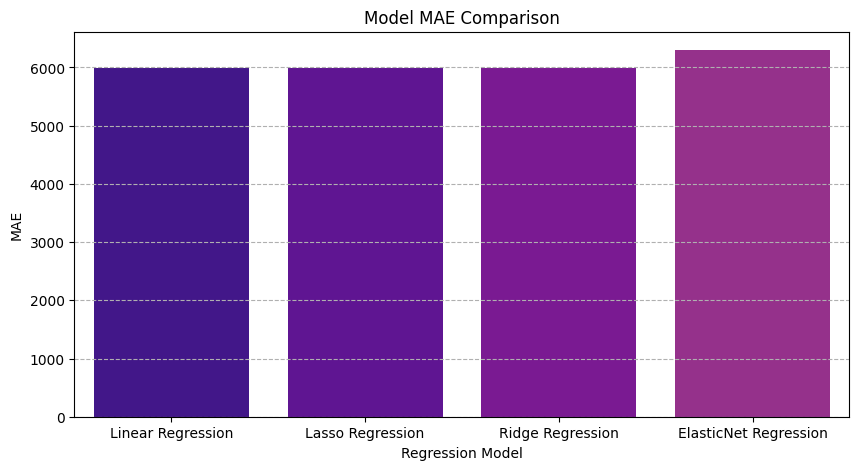

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9784\3007874775.py:64: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.barplot(x=results_df.index, y=results_df['MSE'], hue=results_df.index, palette=custom_cmap, legend=False)


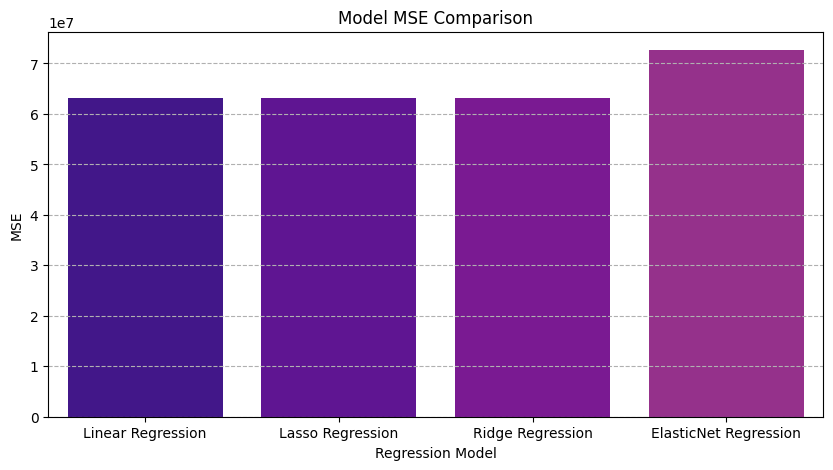

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9784\3007874775.py:73: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.barplot(x=results_df.index, y=results_df['R2 Score'], hue=results_df.index, palette=custom_cmap, legend=False)


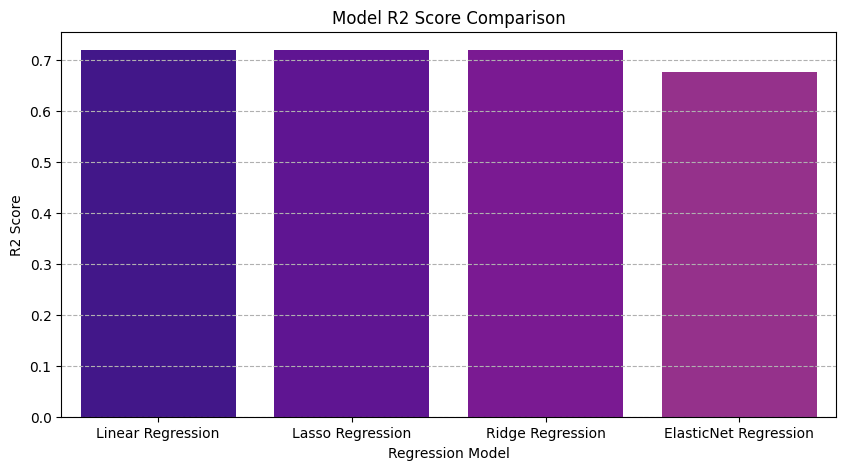

In [155]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Ensure numeric data and remove any missing values
X = X.apply(pd.to_numeric, errors='coerce')
X.dropna(inplace=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(alpha=1.0),
    "Ridge Regression": Ridge(alpha=1.0),
    "ElasticNet Regression": ElasticNet(alpha=1.0, l1_ratio=0.5)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        "MAE": mae,
        "MSE": mse,
        "R2 Score": r2
    }

    print(f"--- {name} ---")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"R2 Score: {r2:.2f}")
    print("-------------------------------")

# Compare model performance visually
results_df = pd.DataFrame(results).T

# Generate a color palette from the plasma colormap with 10 discrete colors
custom_cmap = sns.color_palette("plasma", 10)  # Generates 10 colors from plasma colormap

# Plot Model MAE Comparison
plt.figure(figsize=(10, 5))
sns.barplot(x=results_df.index, y=results_df['MAE'], hue=results_df.index, palette=custom_cmap, legend=False)
plt.title("Model MAE Comparison")
plt.ylabel("MAE")
plt.xlabel("Regression Model")
plt.grid(axis='y', linestyle='--')
plt.show()

# Plot Model MSE Comparison
plt.figure(figsize=(10, 5))
sns.barplot(x=results_df.index, y=results_df['MSE'], hue=results_df.index, palette=custom_cmap, legend=False)
plt.title("Model MSE Comparison")
plt.ylabel("MSE")
plt.xlabel("Regression Model")
plt.grid(axis='y', linestyle='--')
plt.show()

# Plot Model R2 Score Comparison
plt.figure(figsize=(10, 5))
sns.barplot(x=results_df.index, y=results_df['R2 Score'], hue=results_df.index, palette=custom_cmap, legend=False)
plt.title("Model R2 Score Comparison")
plt.ylabel("R2 Score")
plt.xlabel("Regression Model")
plt.grid(axis='y', linestyle='--')
plt.show()


In [156]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grids for each model
param_grid_ridge = {
    'alpha': [0.01, 0.1, 1, 10, 100]
}

param_grid_lasso = {
    'alpha': [0.01, 0.1, 1, 10, 100]
}

param_grid_elasticnet = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'l1_ratio': [0.1, 0.5, 0.9]
}

# Initialize models
ridge = Ridge()
lasso = Lasso()
elastic_net = ElasticNet()

# Perform GridSearchCV for Ridge Regression
ridge_search = GridSearchCV(ridge, param_grid_ridge, cv=5, scoring='r2', n_jobs=-1)
ridge_search.fit(X_train_scaled, y_train)

# Perform GridSearchCV for Lasso Regression
lasso_search = GridSearchCV(lasso, param_grid_lasso, cv=5, scoring='r2', n_jobs=-1)
lasso_search.fit(X_train_scaled, y_train)

# Perform GridSearchCV for ElasticNet Regression
elasticnet_search = GridSearchCV(elastic_net, param_grid_elasticnet, cv=5, scoring='r2', n_jobs=-1)
elasticnet_search.fit(X_train_scaled, y_train)

# Display the best parameters and R2 scores
print("Best Ridge Regression Parameters:", ridge_search.best_params_)
print("Best Ridge R2 Score:", ridge_search.best_score_)

print("Best Lasso Regression Parameters:", lasso_search.best_params_)
print("Best Lasso R2 Score:", lasso_search.best_score_)

print("Best ElasticNet Regression Parameters:", elasticnet_search.best_params_)
print("Best ElasticNet R2 Score:", elasticnet_search.best_score_)


c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.267e+09, tolerance: 2.262e+08
  model = cd_fast.enet_coordinate_descent(


Best Ridge Regression Parameters: {'alpha': 10}
Best Ridge R2 Score: 0.7248487791101313
Best Lasso Regression Parameters: {'alpha': 0.01}
Best Lasso R2 Score: 0.7248577018946202
Best ElasticNet Regression Parameters: {'alpha': 0.01, 'l1_ratio': 0.9}
Best ElasticNet R2 Score: 0.7248500976273137


c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.879e+11, tolerance: 2.262e+08
  model = cd_fast.enet_coordinate_descent(


--- Decision Tree ---
MAE: 4376.31
MSE: 39228607.44
R2 Score: 0.83
-------------------------------
--- Random Forest ---
MAE: 3756.86
MSE: 27517583.03
R2 Score: 0.88
-------------------------------
--- Gradient Boosting ---
MAE: 3525.62
MSE: 23466089.89
R2 Score: 0.90
-------------------------------


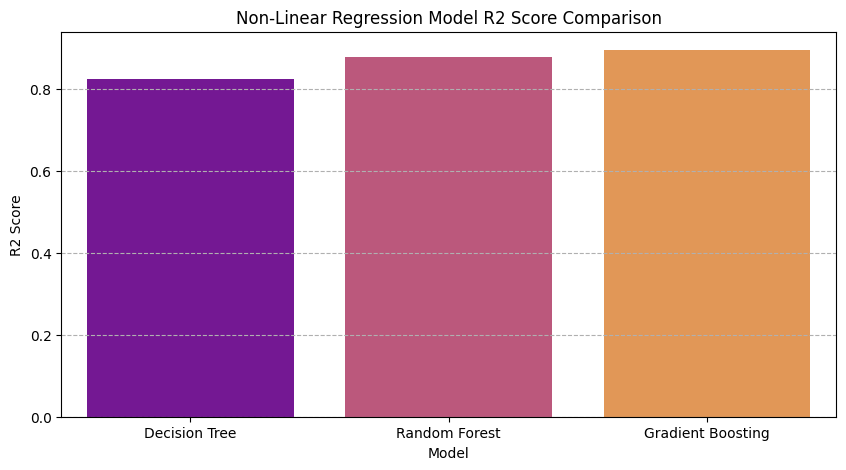

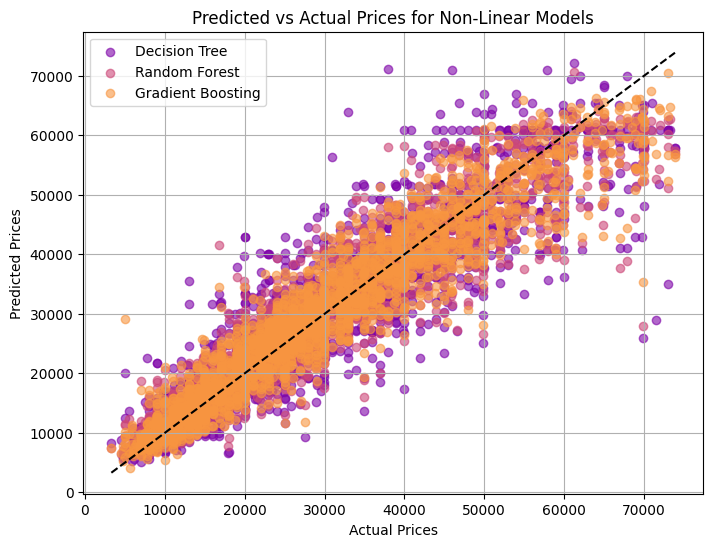

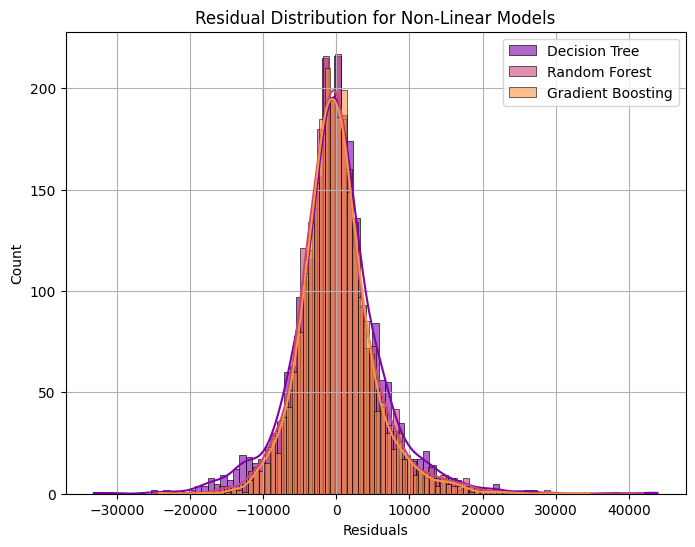

In [157]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# Define non-linear models
non_linear_models = {
    "Decision Tree": DecisionTreeRegressor(max_depth=10, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
}

# Train and evaluate non-linear models
non_linear_results = {}
for name, model in non_linear_models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    non_linear_results[name] = {
        "MAE": mae,
        "MSE": mse,
        "R2 Score": r2
    }

    print(f"--- {name} ---")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"R2 Score: {r2:.2f}")
    print("-------------------------------")

# Convert results to DataFrame and visualize
non_linear_results_df = pd.DataFrame(non_linear_results).T

# Plot results
plt.figure(figsize=(10, 5))
sns.barplot(x=non_linear_results_df.index, y=non_linear_results_df['R2 Score'], hue=non_linear_results_df.index, palette='plasma', legend=False)
plt.title("Non-Linear Regression Model R2 Score Comparison")
plt.ylabel("R2 Score")
plt.xlabel("Model")
plt.grid(axis='y', linestyle='--')
plt.show()

# Scatter plot for predicted vs actual values
plt.figure(figsize=(8, 6))
colors = sns.color_palette("plasma", len(non_linear_models))

for (name, model), color in zip(non_linear_models.items(), colors):
    y_pred = model.predict(X_test_scaled)
    plt.scatter(y_test, y_pred, alpha=0.6, label=name, color=color)

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs Actual Prices for Non-Linear Models")
plt.legend()
plt.grid()
plt.show()

# Residual distribution plot using plasma colormap
plt.figure(figsize=(8, 6))

for (name, model), color in zip(non_linear_models.items(), colors):
    y_pred = model.predict(X_test_scaled)
    residuals = y_test - y_pred
    sns.histplot(residuals, kde=True, label=name, alpha=0.6, color=color)

plt.title("Residual Distribution for Non-Linear Models")
plt.xlabel("Residuals")
plt.legend()
plt.grid()
plt.show()

Best Random Forest Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}
Best Random Forest R2 Score: 0.8711870416728089
Best Gradient Boosting Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 500, 'subsample': 0.8}
Best Gradient Boosting R2 Score: 0.8931214990864003


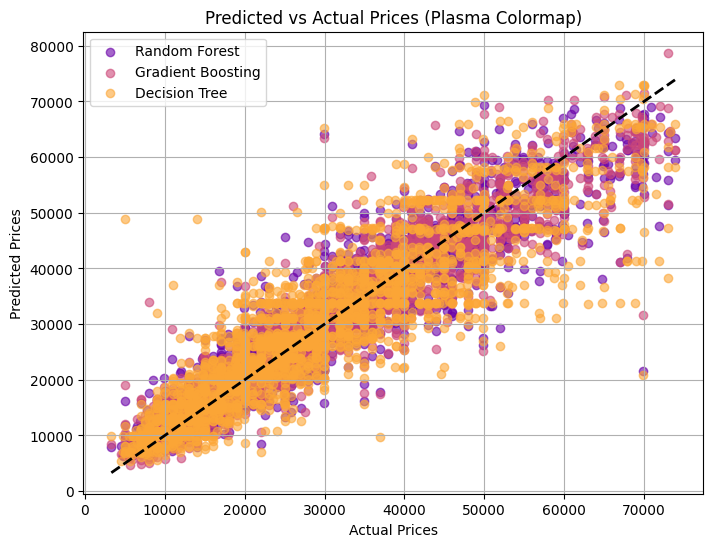

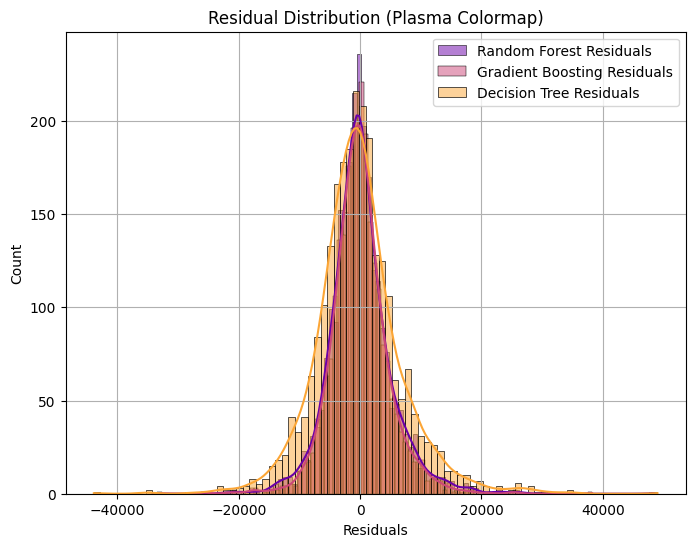

Random Forest Regression Metrics:
MAE: 3684.26
MSE: 27656611.43
R² Score: 0.88

Gradient Boosting Regression Metrics:
MAE: 3412.15
MSE: 23121459.20
R² Score: 0.90

Decision Tree Regression Metrics:
MAE: 5146.04
MSE: 51748071.00
R² Score: 0.77


In [158]:
# Define feature columns and target variable
feature_columns = ['Year', 'Kilometres', 'Engine', 'FuelConsumption', 'Brand']
X = cleaned_data[feature_columns]
y = cleaned_data['Price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 150, 500],
    'max_depth': [5, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define parameter grid for Gradient Boosting
gb_param_grid = {
    'n_estimators': [50, 100, 150, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.8, 1.0]
}

# Hyperparameter tuning for Random Forest
rf = RandomForestRegressor(random_state=42)
rf_grid_search = GridSearchCV(rf, rf_param_grid, cv=5, scoring='r2', n_jobs=-1)
rf_grid_search.fit(X_train_scaled, y_train)
best_rf = rf_grid_search.best_estimator_
print("Best Random Forest Parameters:", rf_grid_search.best_params_)
print("Best Random Forest R2 Score:", rf_grid_search.best_score_)

# Hyperparameter tuning for Gradient Boosting
gb = GradientBoostingRegressor(random_state=42)
gb_grid_search = GridSearchCV(gb, gb_param_grid, cv=5, scoring='r2', n_jobs=-1)
gb_grid_search.fit(X_train_scaled, y_train)
best_gb = gb_grid_search.best_estimator_
print("Best Gradient Boosting Parameters:", gb_grid_search.best_params_)
print("Best Gradient Boosting R2 Score:", gb_grid_search.best_score_)

# Evaluate the tuned models
y_pred_rf = best_rf.predict(X_test_scaled)
y_pred_gb = best_gb.predict(X_test_scaled)
y_pred_dt = DecisionTreeRegressor(max_depth=10, random_state=42).fit(X_train_scaled, y_train).predict(X_test_scaled)

cmap = plt.get_cmap("plasma")
colors = [cmap(0.2), cmap(0.5), cmap(0.8)]  # Choosing 3 distinct colors from plasma colormap

# Plot predicted vs actuall
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, color=colors[0], alpha=0.6, label='Random Forest')
plt.scatter(y_test, y_pred_gb, color=colors[1], alpha=0.6, label='Gradient Boosting')
plt.scatter(y_test, y_pred_dt, color=colors[2], alpha=0.6, label='Decision Tree')

# Reference line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', lw=2, linestyle='--')

plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs Actual Prices (Plasma Colormap)")
plt.legend()
plt.grid()
plt.show()

# Residual plots
residuals_rf = y_test - y_pred_rf
residuals_gb = y_test - y_pred_gb
residuals_dt = y_test - y_pred_dt

plt.figure(figsize=(8, 6))
sns.histplot(residuals_rf, kde=True, color=colors[0], label='Random Forest Residuals')
sns.histplot(residuals_gb, kde=True, color=colors[1], label='Gradient Boosting Residuals')
sns.histplot(residuals_dt, kde=True, color=colors[2], label='Decision Tree Residuals')

plt.title("Residual Distribution (Plasma Colormap)")
plt.xlabel("Residuals")
plt.legend()
plt.grid()
plt.show()

# Print evaluation metrics
print("Random Forest Regression Metrics:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_rf):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_rf):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred_rf):.2f}")

print("\nGradient Boosting Regression Metrics:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_gb):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_gb):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred_gb):.2f}")

print("\nDecision Tree Regression Metrics:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_dt):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_dt):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred_dt):.2f}")

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Define feature columns and target variable
feature_columns = ['Year', 'Kilometres', 'Engine', 'FuelConsumption', 'BodyType','Brand']
X = cleaned_data[feature_columns]
y = cleaned_data['Price']

# Drop rows with missing target variable or features
X = X.dropna(subset=feature_columns)
y = y.dropna()

# One-hot encode the categorical feature 'BodyType'
encoder = OneHotEncoder(drop='first', sparse_output=False)
bodytype_encoded = encoder.fit_transform(X[['BodyType']])
bodytype_encoded_df = pd.DataFrame(bodytype_encoded, columns=encoder.get_feature_names_out(['BodyType']))

# Drop the original categorical column and merge the encoded data
X = X.drop(columns=['BodyType'])
X = pd.concat([X.reset_index(drop=True), bodytype_encoded_df.reset_index(drop=True)], axis=1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train XGBoost model
xgb_model = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=200,
    max_depth=7,
    learning_rate=0.1,
    subsample=0.8,
    random_state=42
)
xgb_model.fit(X_train_scaled, y_train)

# Train LightGBM model
lgb_model = LGBMRegressor(
    n_estimators=200,
    max_depth=7,
    learning_rate=0.1,
    num_leaves=31,
    random_state=42
)
lgb_model.fit(X_train_scaled, y_train)

# Evaluate the models
y_pred_xgb = xgb_model.predict(X_test_scaled)
y_pred_lgb = lgb_model.predict(X_test_scaled)

def evaluate_model(model_name, y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"--- {model_name} ---")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"R² Score: {r2:.2f}")
    print("-------------------------------")

# Print the evaluation results
evaluate_model("XGBoost", y_test, y_pred_xgb)
evaluate_model("LightGBM", y_test, y_pred_lgb)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000513 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 453
[LightGBM] [Info] Number of data points in the train set: 10040, number of used features: 12
[LightGBM] [Info] Start training from score 30230.842131
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


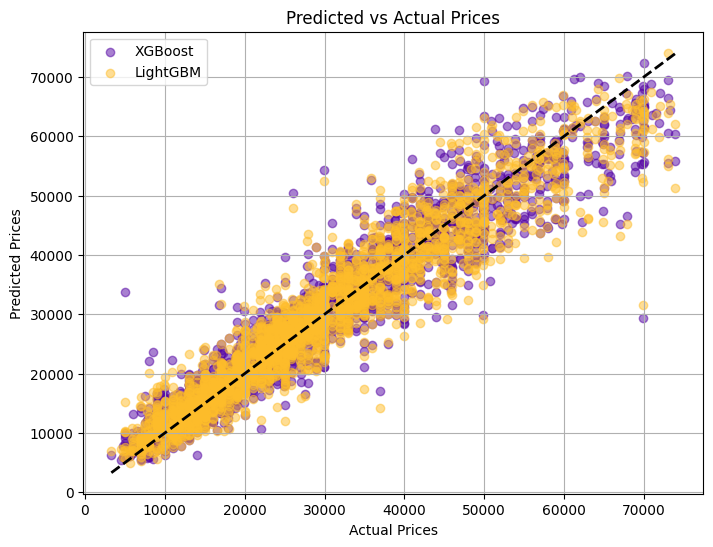

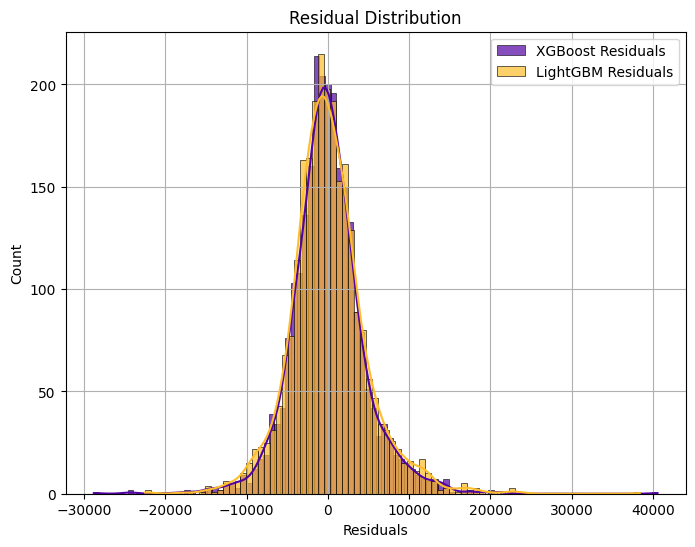

In [166]:
import matplotlib.pyplot as plt

# Get distinct colors from the plasma colormap
cmap = plt.get_cmap('plasma')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]  # Get 4 distinct colors

# Plot predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_xgb, color=colors[1], alpha=0.5, label='XGBoost')
plt.scatter(y_test, y_pred_lgb, color=colors[6], alpha=0.5, label='LightGBM')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', lw=2, linestyle='--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs Actual Prices")
plt.legend()
plt.grid()
plt.show()

# Plot residuals distribution
residuals_xgb = y_test - y_pred_xgb
residuals_lgb = y_test - y_pred_lgb

plt.figure(figsize=(8, 6))
sns.histplot(residuals_xgb, kde=True, color=colors[1], label='XGBoost Residuals', alpha=0.7)
sns.histplot(residuals_lgb, kde=True, color=colors[6], label='LightGBM Residuals', alpha=0.7)
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.legend()
plt.grid()
plt.show()